# Coursework One - Q3 - Wisconsin Cancer - Student

Please List Members of Team and Student IDs below:

- Member 1: Alban Potteivin - 72205

- Member 2: Greta Bruno - 73702

- Member 3: Manuel Minichillo - 73711

- Member 4: Simone Gennari - 87254

Which member of the team is responsible for this notebook: 
- Alban Poittevin - 72205
- Manuel Minichillo - 73711

## Instructions

This is a well-known dataset on predicting cancer. It involves the analysis of tumours. A tumour can be benign (not cancerous) or malignant (cancerous). Using various geometrical measurements of actual tumours, the objective is to determine whether or not a tumour is benign or malignant.

The purpose of this question is to find the best model for predicting malignancy correctly. The data is provided by Sklearn using

from sklearn.datasets import load_breast_cancer

Some of the data fields are differently scaled values. In the following you are to 

1. Load the data from Scikit learn using

<b>from sklearn.datasets import load_breast_cancer
    
data = load_breast_cancer()</b>

2. Examine the dataframe for missing data and decide how to treat these

3. Try to see which features have the best explanatory power. 

4. Also, deal with categorical data and use feature standardization

5. Choose metrics for model evaluation

6. Use the following models - Logistic Regression, KNN (test for different values of K), Decision Tree and SVM Classifier

7. Use training and testing to identify the best model

8. Write a summary explaining your results.

In [74]:
# import necessary librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import image from website
from IPython.display import Image
from IPython.core.display import HTML 

#%pip install graphviz

#For Graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'


plt.style.use("seaborn")
%matplotlib inline

## 1. Loading the data using scikit learn

### 1.1 Loading

In [75]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

### 1.2 Description of the Data

In [76]:
#Understand with what the data is made of
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### 1.3 Creation of the dataframe

In [77]:
#Create a dataframe with the 30 attributes
data_df = pd.DataFrame(data.data, columns=data.feature_names)

#Display the first 10 row of the dataframe
data_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [78]:
#Update columns to remove space by dash
list_col= data_df.columns.values
list_col = [string.replace(" ","_") for string in list_col]
data_df.columns = list_col
data_df.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.4 First look at the labels: Malignant & Benign

In [79]:
#Add the target i.e Malignant or Benign
data_df["target"] = data.target

In [80]:
#Look at the target i.e Malignant or Benign
a = data.target
uni_el, count_el = np.unique(a, return_counts=True)
print("Binary Data:")
print(uni_el[0], "for malignant")
print(uni_el[1], "for benign")
print('')
print("How many values for malignant and for benign type of cancer?")
print("Number of malignant tumours:", count_el[0])
print("Number of benign tumours:", count_el[1])

Binary Data:
0 for malignant
1 for benign

How many values for malignant and for benign type of cancer?
Number of malignant tumours: 212
Number of benign tumours: 357


Text(0.5, 0, 'Number of tumors')

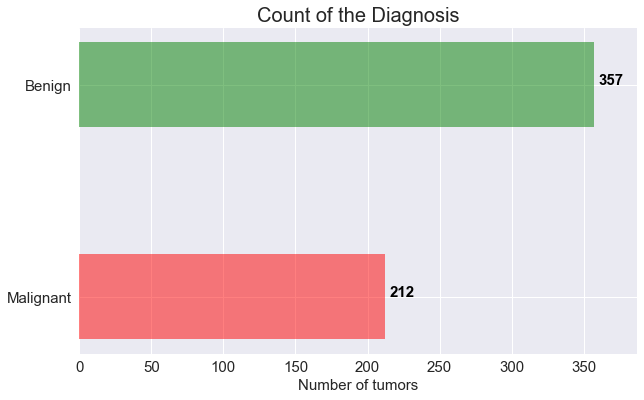

In [81]:
# Let's take a look at the distribuion between Malignant & Benign
# Creation of a df for each of the two variables
M = data_df[data_df.target == 0]
B = data_df[data_df.target == 1]

#Plot data
plt.figure(figsize=(10,6))
plt.barh([1,2],[len(M.target),len(B.target)], align= "center", color=["red","green"], height=0.4, alpha=0.5)

#Format axis
plt.yticks([1,2], labels=("Malignant","Benign"))
plt.tick_params(axis="both", labelsize=15)
plt.text(len(M.target) + 3, 1, str(len(M.target)), color='black', fontweight='bold', fontsize=15)
plt.text(len(B.target) + 3, 2, str(len(B.target)), color='black', fontweight='bold', fontsize=15)
plt.xlim(xmax=len(B.target) + 30)

#Legend & Title
plt.title("Count of the Diagnosis", fontsize=20)
plt.xlabel('Number of tumors', fontsize=15)

## 2. Examination of the dataframe for missing data

In [82]:
#Get Summary statistics
data_df.drop("target",axis=1).describe() #Drop target as it has no importance here

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We could compare the max & min from "Summary Statistics" of the description to be
sure that there are no discrepancies.

### 2.1 Type and Count elements for each feature

In [83]:
#Get information
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

We have **30 features** (excluding target) in the dataframe. All data are numerical, so no modification necessary.

### 2.2 Search of missing data

In [84]:
#Check for na values
data_df.isna().sum()

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
target                     0
dtype: int64

**Observation**: No missing Data

### 2.4 Search of Duplicates

In [85]:
# Check for duplicate
data_df.duplicated().sum()

0

**Observation**: No duplicates

#### Conclusion Q2
From our analysis, we can conclude that there are no missing data and no duplicates in the dataframe. Furthermore, all features have numerical data. Thus we can start analysing closer the dataset.

## 3. Explanatory power of the features

### 3.1 Vizualization
#### 3.1.1 Distribution

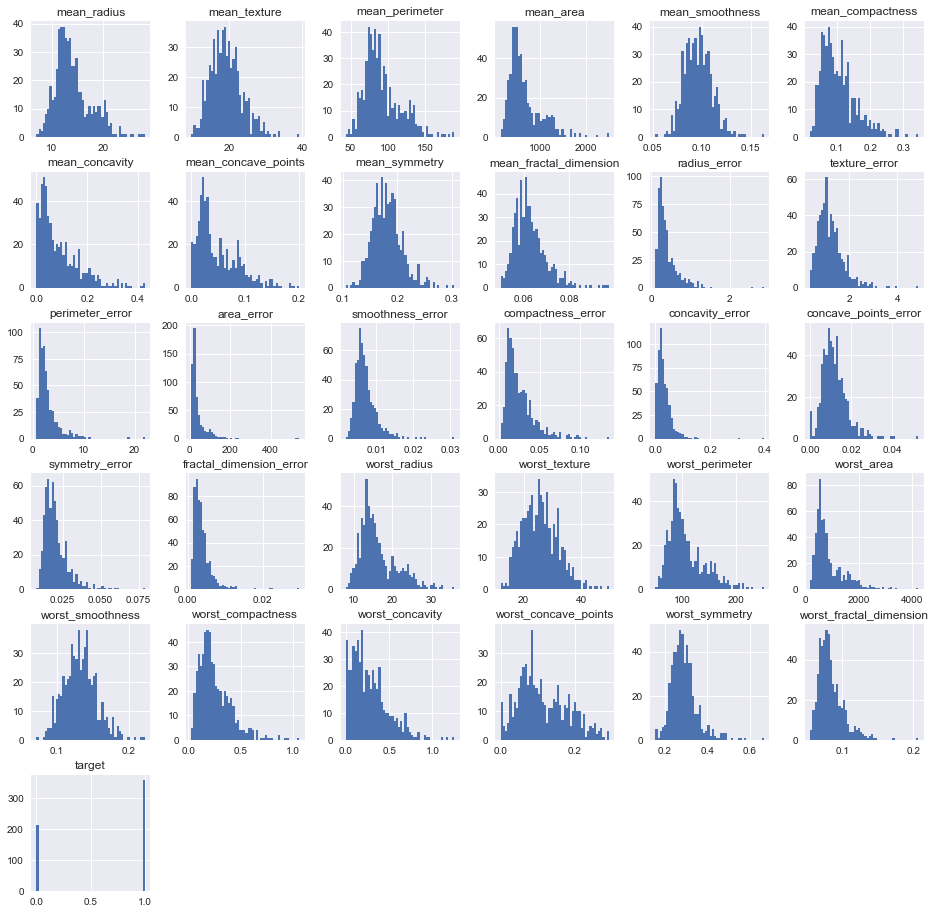

In [86]:
#Let's have a first look at the distribution of the data
data_df.hist(figsize=(16,16), bins=50);

#### 3.1.2 Features by class (i.e Malignant-0 or Benign-1)

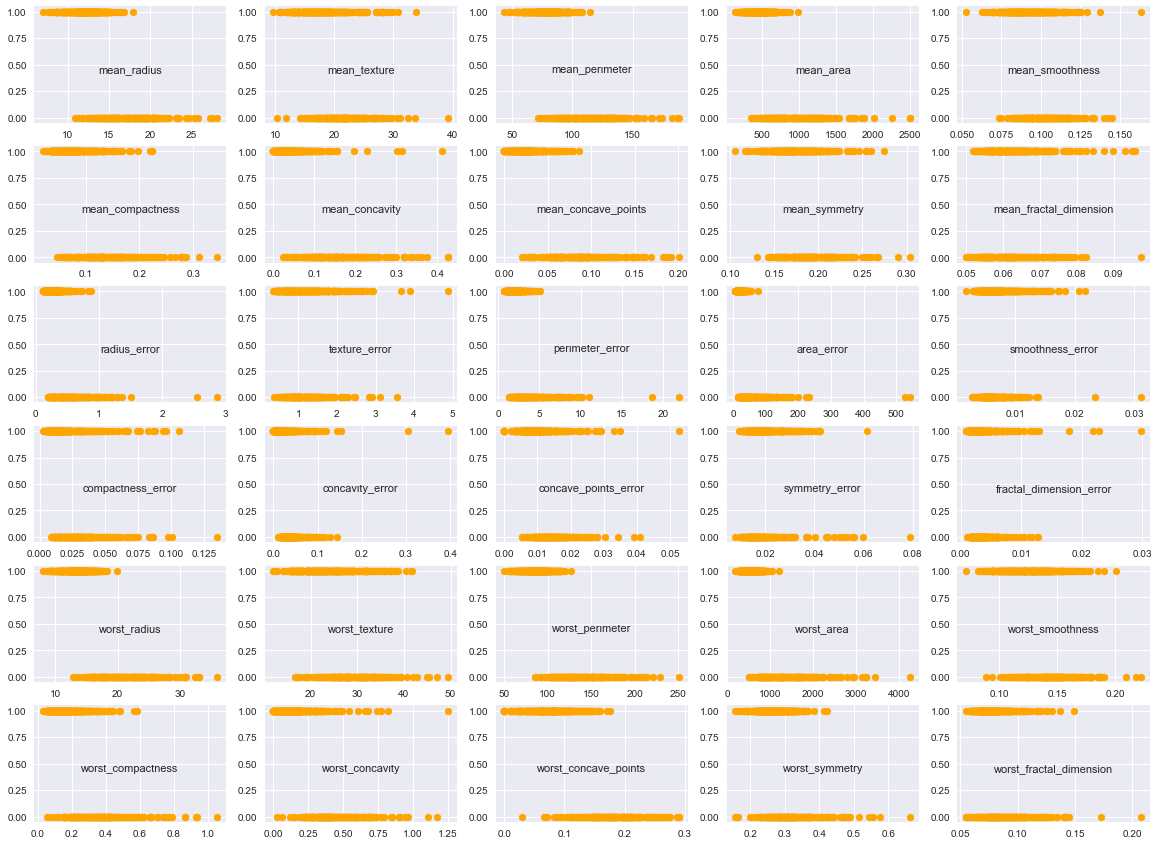

In [87]:
fig, ax= plt.subplots(nrows=6, ncols=5, figsize=(20,15))
i, j = 0, 0 #counter
for feature in list(data_df.columns):
    ax[i][j].scatter(data_df[feature], data_df.target, color='orange')
    ax[i][j].set_xlabel(feature, labelpad=-75)
    j+=1
    if j == 5:
        i, j = i+1, 0
    if i ==6:
        break

**Observation** Some features seems to don't have clear explanatory power as a Malignant and Benign tumors share the same characteristics. Those features are: 
- **Smoothness**: mean_smoothness, smoothness_error, worst_smoothness
- **fractal**: mean_fractal_dimension, fractal_dimension_error, worst_fractal_dimension
- **symmetry**: mean_symmetry, symmetry_error, worst_symmetry

## 3.2 Features Correlation
### 3.2.1 First hint with the mean
To get an idea about the relation between the data. We have 30 features, if we were to plot one feature against another we will have $\binom{30}{2}=435$ plots. It will be unreadable.<br>

First, we are going only going to look at the **mean of each feature** against another one, to see if a pattern emerges. We will have $\binom{10}{2}=45$ plots. <br> <br>
To do so we will use a function from seaborn *seaborn.pairplot*

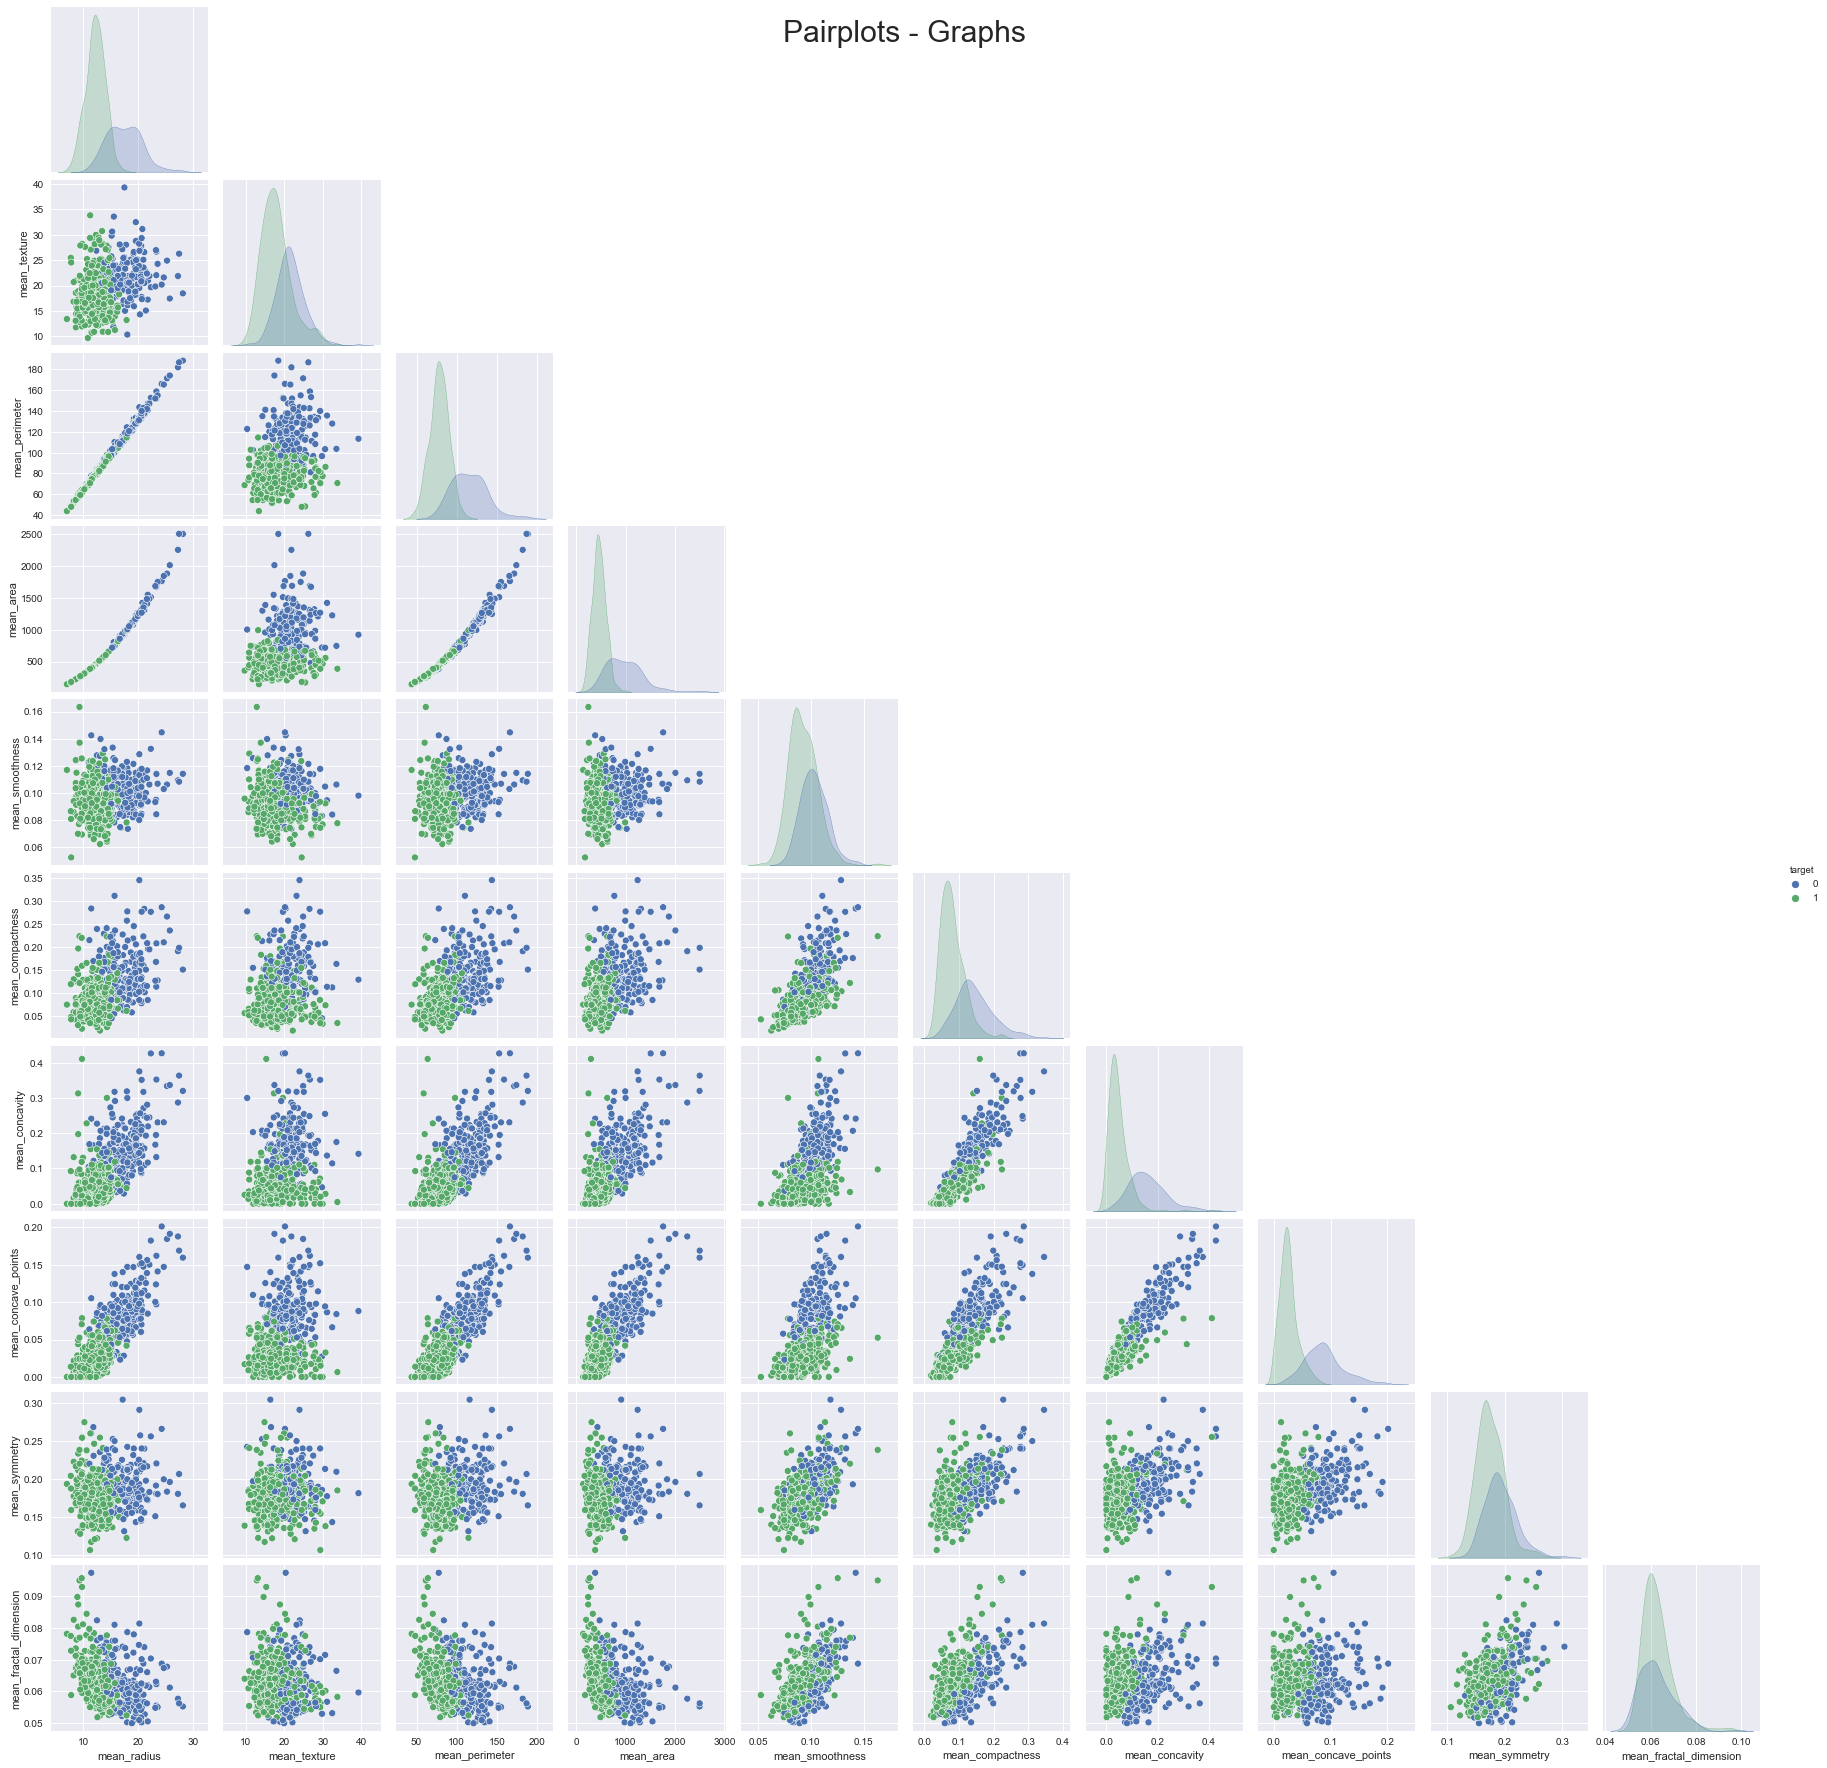

In [88]:
#Create list with the mean features
list_mean = data_df.columns[:10].to_list()

#Create the pairplot
#Corner allows to remove duplicate graph
pp = sns.pairplot(data_df, hue="target", vars= list_mean, corner=True)
pp.fig.suptitle("Pairplots - Graphs", fontsize=30)
sns.set_context(rc={"axes.labelsize":17});

**Observations**:<br>
From the plots above it seems that some features are highly correlated (i.e straight line between the two features). Indeed, the dataset has 30 different features but they are closely linked as they contain information about the same 10 attributes looking at different statistical measures (i.e mean, error, and worst.) <br>
Ten attributes we are looking at:
- radius 
- texture
- perimeter
- area
- smoothness 
- compactness
- concavity
- concave points
- symmetry
- fractal dimension <br> <br>

As shown above we have **multicollinearity** between some features. For instance, it looks like mean_radius, mean_perimeter and men_area are highly correlated. Other features might be highly correlated. So, let's have a look at the correlation matrix of the 30 features.

### 3.2 Correlation between features - Heatmap
Using pairplot with each 30 features will lead to the creation of 465 plots. It will be unreadable. Creating an heatmap of the correlation will allow us to check more easily for strongly correlated features.<br>
Here, the feature *"target"* is removed from the dataframe as it doesn't make sense to look at it (Binary data in target)

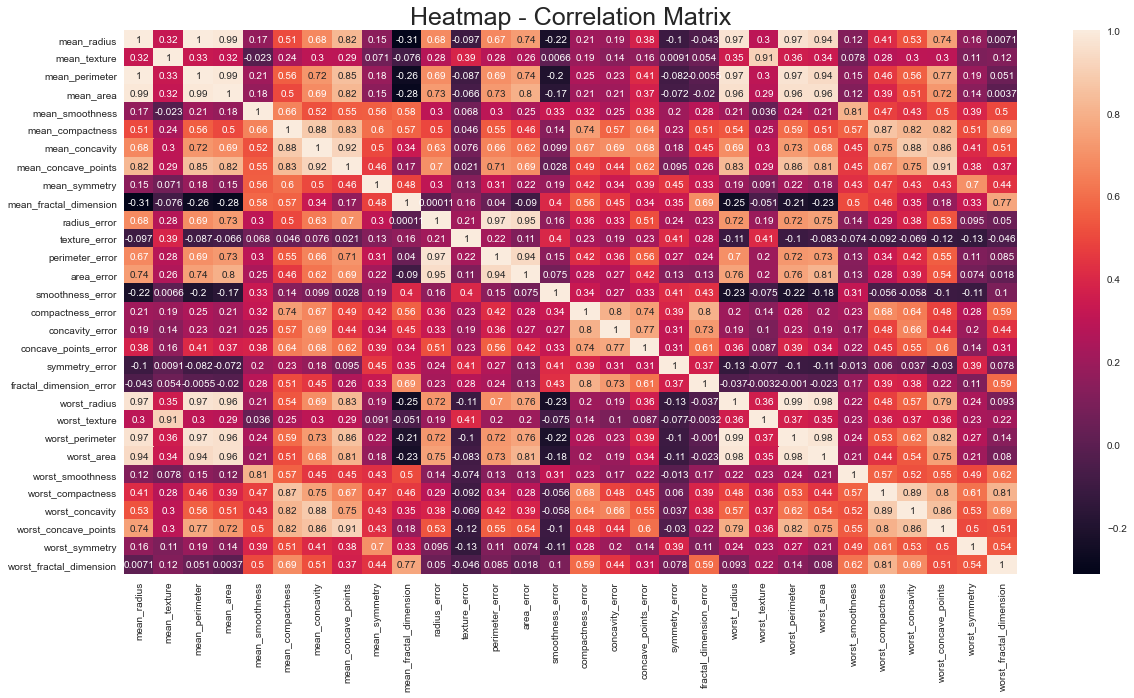

In [89]:
plt.figure(figsize=(20,10))
plt.title("Heatmap - Correlation Matrix", fontsize=25)
#plt.figure(figsize=(15,10))
sns.heatmap(data_df.drop(columns=["target"]).corr(), annot=True)
sns.set_context(rc={"axes.labelsize":15})

From the heatmap of the correlation matrix we can clearly see that other features are highly correlated. Let's look at the most highly correlated features in the dataset.

In [90]:
#Get the data with the highest correlation
corr_level = 0.96 #Correlation threshold
corr_df = data_df.corr() #Get correlation
corr_features = np.where(np.abs(corr_df) > corr_level) # select ones above the abs level

high_corr=[]
for k in range (len(corr_features[0])):
    x, y = corr_features[0][k], corr_features[1][k]
    if x!=y and x<y:
        #Create a list with the name of the parameters and the correlation value
        high_corr.append([corr_df.index[x], corr_df.columns[y], corr_df.iloc[x,y]]) 

#Display elements
high_corr


[['mean_radius', 'mean_perimeter', 0.9978552814938113],
 ['mean_radius', 'mean_area', 0.9873571700566119],
 ['mean_radius', 'worst_radius', 0.9695389726112053],
 ['mean_radius', 'worst_perimeter', 0.9651365139559878],
 ['mean_perimeter', 'mean_area', 0.9865068039913906],
 ['mean_perimeter', 'worst_radius', 0.9694763634663142],
 ['mean_perimeter', 'worst_perimeter', 0.9703868870426388],
 ['mean_area', 'worst_radius', 0.9627460860470841],
 ['radius_error', 'perimeter_error', 0.9727936770160753],
 ['worst_radius', 'worst_perimeter', 0.993707916102951],
 ['worst_radius', 'worst_area', 0.9840145644590724],
 ['worst_perimeter', 'worst_area', 0.9775780914063881]]

**Observation**<br> From the list above we can make three statements:<br> <br>

1. We see that "*mean_radius*", "*mean_perimeter*", and "*mean_area*" are highly correlated with a correlation ratio above 0.98. As mentioned above it's probably due to the fact that radius, perimeter, and area contains the same information linked to the physical size of the tumour.To reduce our dataset, we can choose among one of the three features.<br><br>

2. We can also identify a high correlation between "*worst_radius*", "*worst_perimeter*", and "*worst_area*". Thus, we could choose one of the three features for our analysis.<br><br>

3. **Mean** and **Worst** are also highly correlated (for radius, perimeter and area, correlation >0.96). It makes sense because *worst* values are included in the *mean*. Moving forward, choosing only the **mean** to reduce our dataset makes sense.

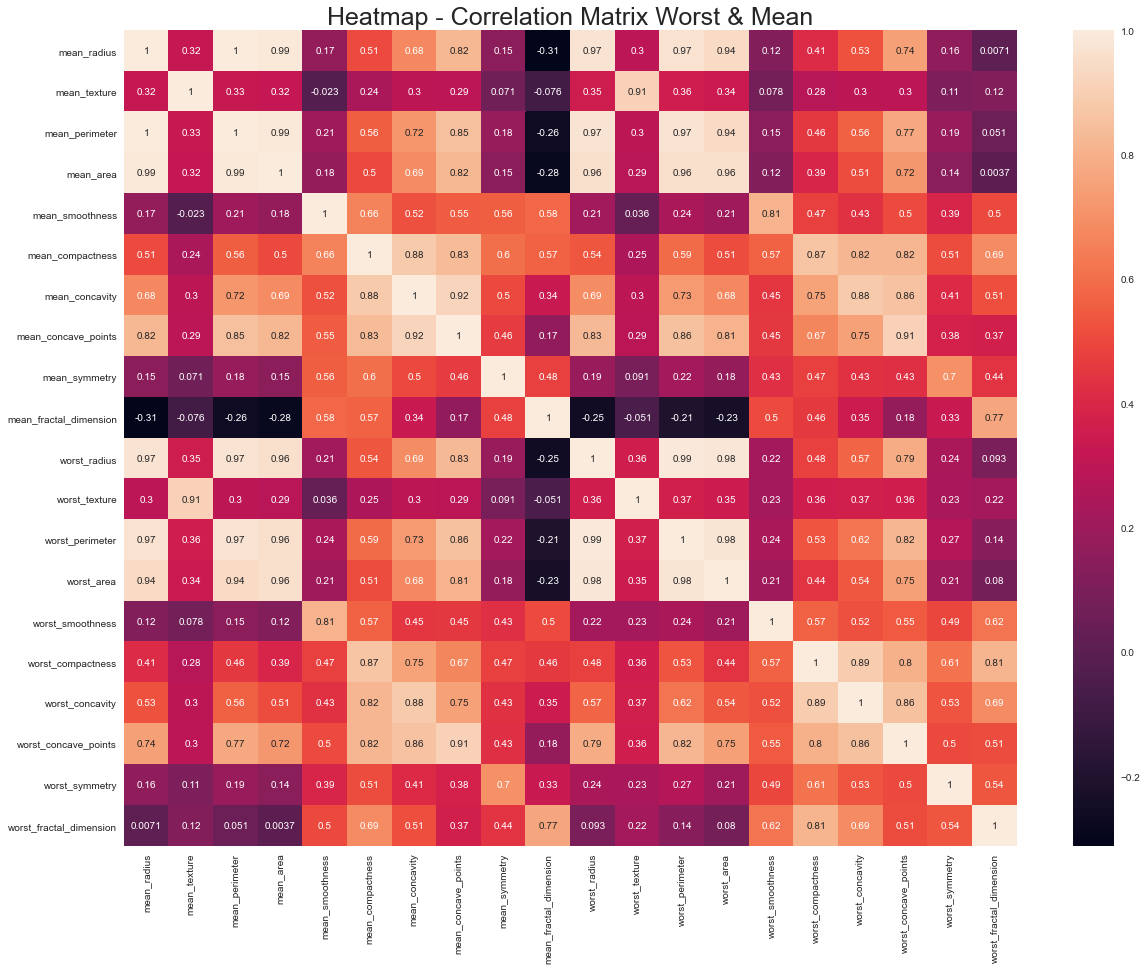

In [91]:
#Heatmap correlation between mean and worst features.
list_worst = data_df.columns[20:-1].to_list()
plt.figure(figsize=(20,15))
plt.title("Heatmap - Correlation Matrix Worst & Mean", fontsize=25)
sns.heatmap(data_df[list_mean+list_worst].corr(), annot=True)
sns.set_context("paper", rc={"axes.labelsize":25})

### 3.3 Distribution by classes

C:\Users\banba\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 720x720 with 0 Axes>

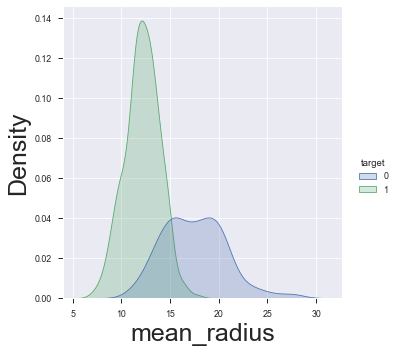

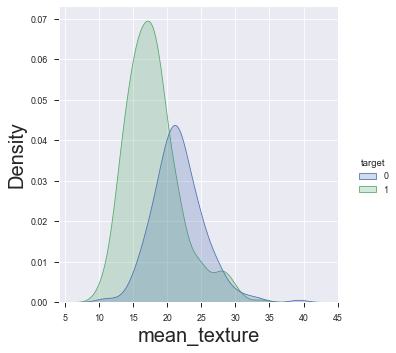

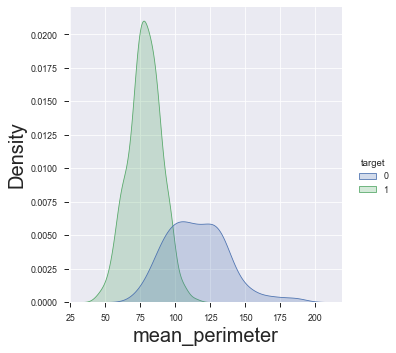

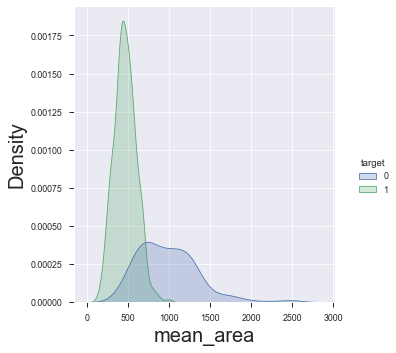

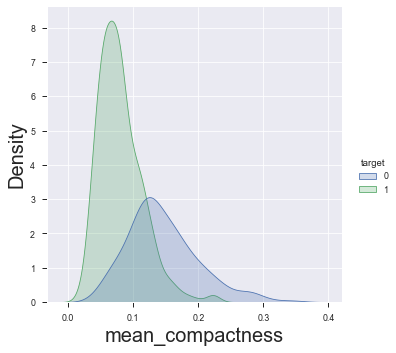

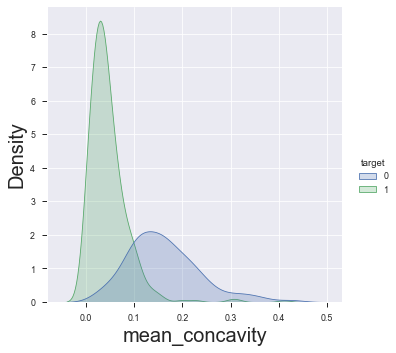

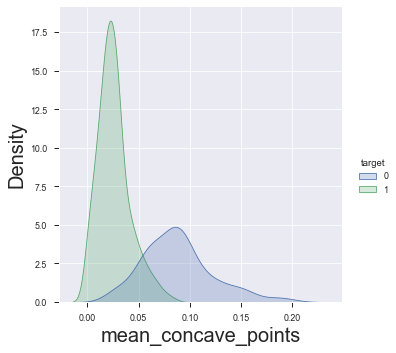

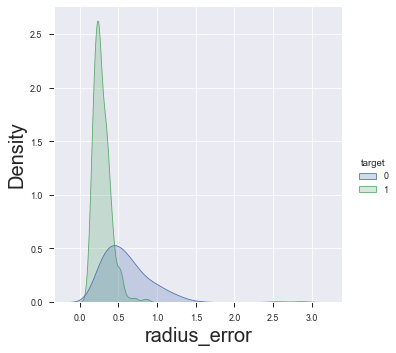

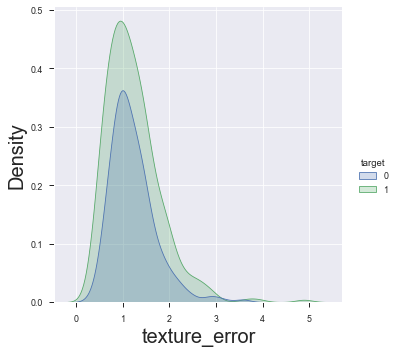

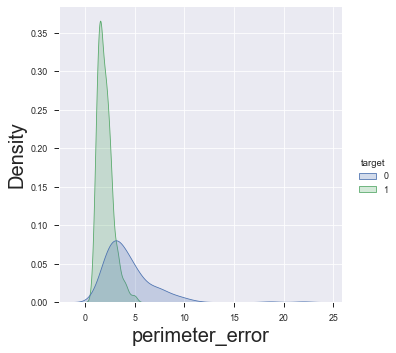

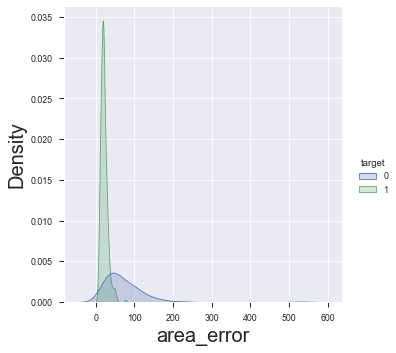

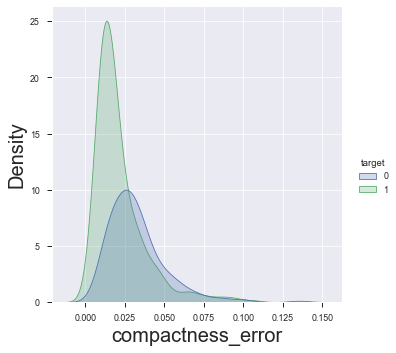

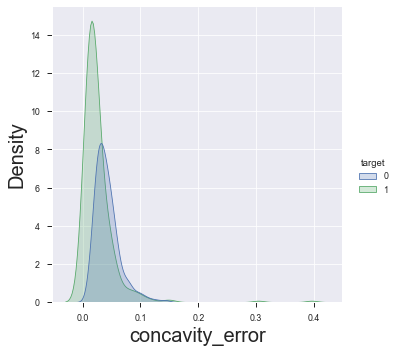

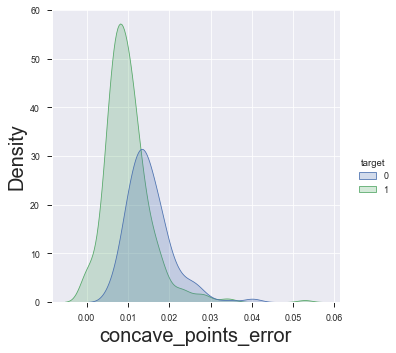

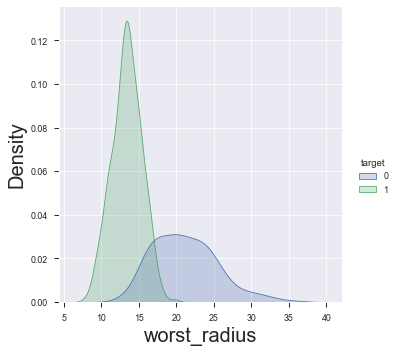

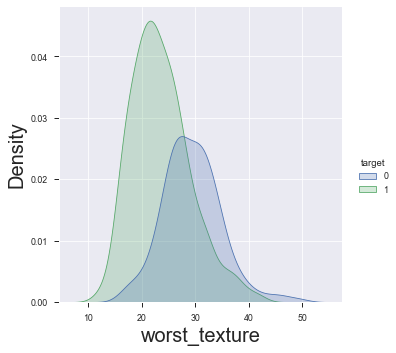

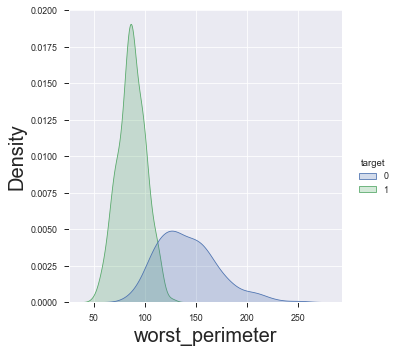

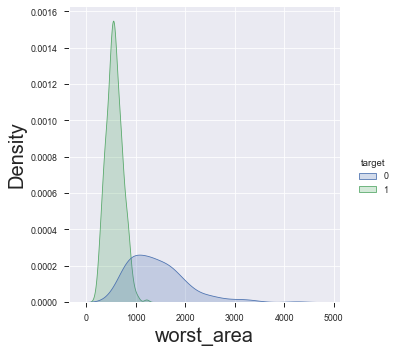

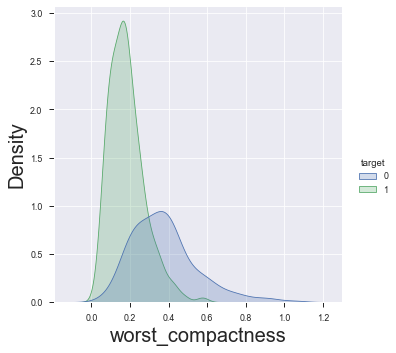

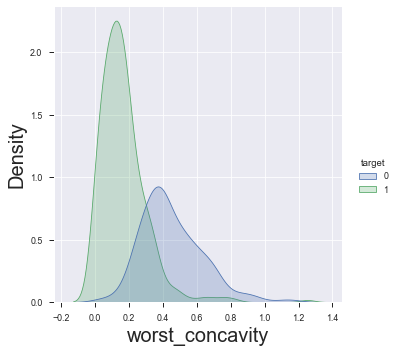

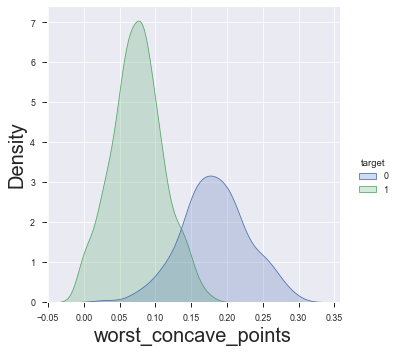

In [92]:
#From 3.1 we have:
list_to_remove = ["mean_smoothness", "smoothness_error", "worst_smoothness","mean_fractal_dimension",
           "fractal_dimension_error", "worst_fractal_dimension", "mean_symmetry", "symmetry_error", "worst_symmetry"]

plt.figure(figsize=(10,10))
for feature in list(data_df.columns):
    if feature not in list_to_remove and feature != "target":
        sns.displot(data_df, x=feature, hue="target", kind="kde", fill=True)
        sns.set_context("paper", rc={"axes.labelsize":20});

**Conclusion**: We have identified feature with the least explanatory power and features which are hihgly correlated. With the final plots above we can try to identify the features with the best explanatory power. We the two labels for one feature are clearly differentiable we can assume that they will have more explanatory power to find which tumor is benign or malignant. The top features are:
- Mean radius, mean perimeter, and mean area (but those three are highly correlated)
- Worst radius, worst perimeter, and worst area (but those three are highly correlated)
- Worst concave points
- Mean concave points

## 4. Dealing with categorical data & feature standardization

### 4.1 Categorical Data
There is no categorical data. Indeed, using *data.target* we directly have binary data for **Malignant** and **Benign**. If we had **Malignant** and **Benign** instead of binary data, we could have use Label Encoding.

### 4.2 Feature Standardization
In our dataset we have multiples features that have different degrees of magnitude, range, and units (m, $m^2$, radian, and no units). Let's standardize the features in our dataset. Two simple methods can be used:
- Using zscores. The function computing zscores can be easily applied to a dataframe as shown below.
- Using fit.transform() from sklearn. (Not used here)

/!\ Standardization should not be done on the target

In [93]:
# Let's compute z-score
from scipy.stats import zscore
standard_df = data_df.drop("target", axis=1).apply(zscore)
standard_df["target"] = data_df.target

## 5. Metrics for model evaluation

First to be inline with the metrics (especially confusion matrix) used below we will switch the value assigned 
to Malignant and Benign, as we want to predict cancer .i.e Malignant = 1 & Benign = 0

In [94]:
standard_df["target"] = abs(data.target-1)
standard_df.target.value_counts()

0    357
1    212
Name: target, dtype: int64

### 5.1 Confusion Matrix (for visualization) <br>
- TP - Correctly identified Malignant tumours <br>
- TF - Correctly identified Benign tumours 

In [95]:
Image(url= "https://miro.medium.com/max/1400/1*fxiTNIgOyvAombPJx5KGeA.png",width=500, height=500)

### 5.2 Accuracy <br>
$Accuracy=\frac{TP+TN}{TP+TN+FP+FN}$

Using Accuracy can deliver biased result as the dataset is not perfectly balanced.

In [96]:
#Proportion of Malignant and Benign tumors in the dataset
print("Percentage of Malignant tumours: %5.2f"% (100*len(M)/(len(M)+len(B))),"%")
print("Percentage of Benign tumours: %5.2f"% (100*len(B)/(len(M)+len(B))),"%")

Percentage of Malignant tumours: 37.26 %
Percentage of Benign tumours: 62.74 %


To better asses the accuracy of the model we will use two other metrics:

### 5.3 Recall
$Recall = \frac{TP}{TP+FN}$ (Malignant tumours correctly identified out of all the malignant tumors)

### 5.4 Precision
$Precision = \frac{TP}{TP+FP}$ (Malignant tumours correctly identified out of all correctly identified tumors)

Using accuracy, recall, and precision will allow the model to avoid the two following scenarios:

| Scenario | Accuracy | Recall | Precision |
| --- | --- | --- | --- |
| Classify all tumors as Benign | 62.74% | 0% | 0% |
| Classify all tumors as Malignant | 37.26%  | 100% | 37.26% |

### 5.5 F1-Score
To have both high recall and precision we can use on last metric **F1-measure**
- $F1 = 2*\frac{precision*recall}{precision+recall}$

In [97]:
#Load the metrics, classification report, and confusion matrix from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
import HelpfulFunctions as hp

## 6. Using Models - Logistic Regression, KNN (test for different values of K), Decision Tree and SVM Classifier

### 6.1 Train, test, split

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X = standard_df.drop("target", axis=1)
y= standard_df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1278)

### 6.2 Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train) #Fit model

LogisticRegression(solver='liblinear')

**In Sample/Train test fit**

In [102]:
#Classification report
y_pred = log_reg.predict(X_train) #Prediction
print(classification_report(y_train, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9879    1.0000    0.9939       245
           1     1.0000    0.9804    0.9901       153

    accuracy                         0.9925       398
   macro avg     0.9940    0.9902    0.9920       398
weighted avg     0.9926    0.9925    0.9924       398



**Out of Sample / Test Set fit**

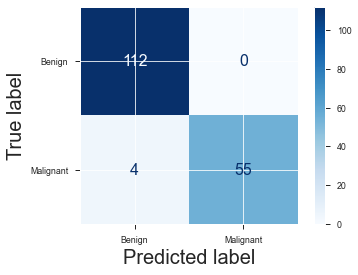

In [103]:
#Prediction using the test set
y_pred = log_reg.predict(X_test) #Prediction
#Confusion matrix
hp.plot_cm(log_reg, X_test, y_test, labels=['Benign','Malignant'])

The model missclassified **four** Maligant tumors (.i.e False Negative)

In [104]:
#Classification report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9655    1.0000    0.9825       112
           1     1.0000    0.9322    0.9649        59

    accuracy                         0.9766       171
   macro avg     0.9828    0.9661    0.9737       171
weighted avg     0.9774    0.9766    0.9764       171



**Comparison**: Train vs Test fit

| Set | Accuracy | Precision | Recall | F1-Score|
| --- | --- | --- | --- | --- |
| In Sample/Train | 0.9925 | 1.00 | 0.9804 | 0.9901 |
| Out Sample/Test | 0.9766 | 1.00 | 0.9322 | 0.9649 |

As expected out of sample the model as a lower F1-score, all metrics are very good and emphasized the fact the model fit the data well and predict well the data.

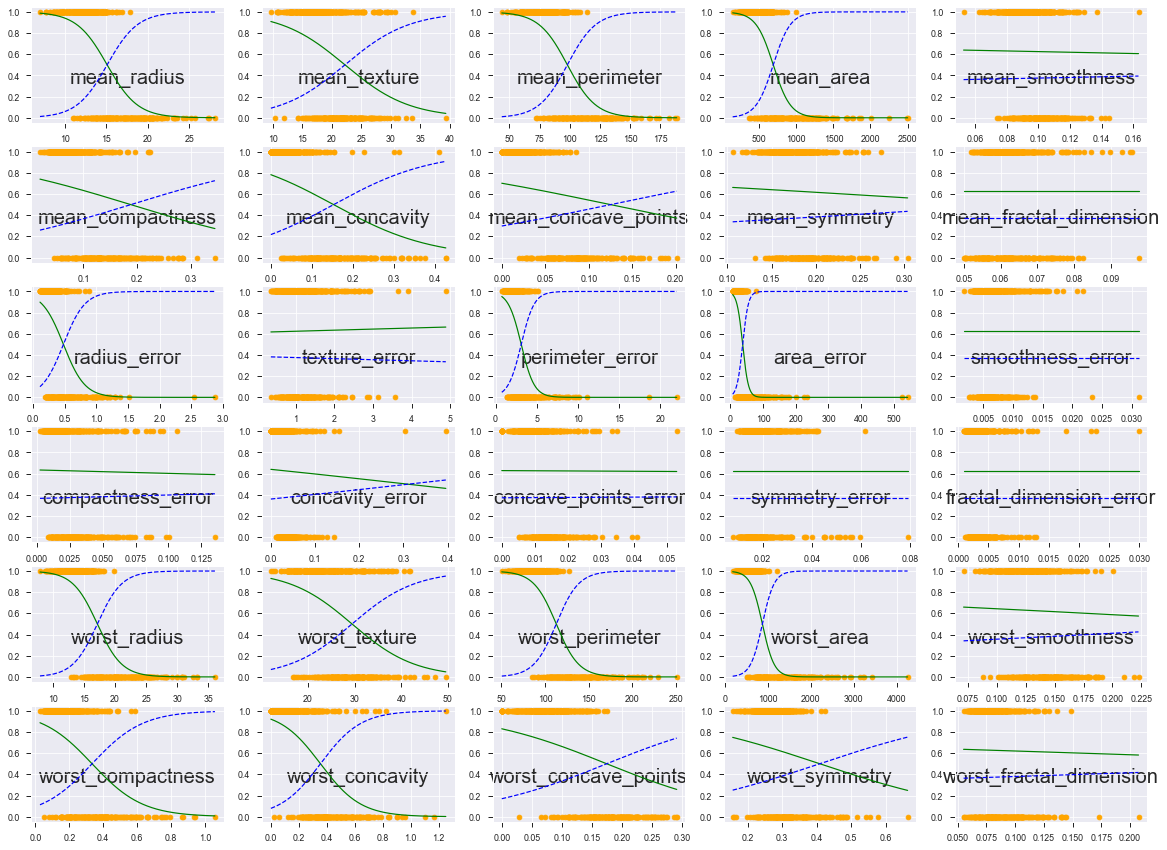

In [105]:
#Let's now low at the logistic regression for each feature

fig, ax= plt.subplots(nrows=6, ncols=5, figsize=(20,15))
i, j = 0, 0 #Counter
log_reg = LogisticRegression(solver='liblinear')

for feature in list(data_df.columns):
    #Train & Predict
    X_train_f = data_df[feature].values.reshape(-1,1)
    log_reg.fit(X_train_f, y)
    X_new = np.linspace(X_train_f.min(),X_train_f.max(),1000).reshape(-1,1)
    y_proba = log_reg.predict_proba(X_new)
    
    #Plot
    ax[i][j].scatter(data_df[feature], data_df.target, color='orange')
    ax[i][j].set_xlabel(feature, labelpad=-75)
    
    ax[i][j].plot(X_new,y_proba[:,0],"g-",label="Malign",)
    ax[i][j].plot(X_new,y_proba[:,1],"b--",label="Benign")
    
    #Counter
    j+=1
    if j == 5:
        i, j = i+1, 0
    if i ==6:
        break

**Observation** We see that for some features is impossible to differentiates the tumors. (As seen in 3.1.2)

### 6.3 K Nearest Neighbors

In [106]:
#Import
from sklearn.neighbors import KNeighborsClassifier

In [107]:
#Tyranny of the majority - Use the max value of K to avoid that
K_max = min(y_train.value_counts()[1]*2 - 1, len(y_train) - 1)

#Dataframe to stock the value of the metrics for each value of K
metrics_df = pd.DataFrame(columns=["K","Accuracy","Recall","precision","F1"])

for k in range(1,K_max+1,1): #K_max+1 to include k = K_max
    #Fit & Prediction
    knn = KNeighborsClassifier(n_neighbors = k, p=2, weights="distance")
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    #Metrics
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    #Append to df
    new_row = {"K": k,"Accuracy":acc,"Recall": recall,"precision": precision,"F1": f1}
    metrics_df = metrics_df.append(new_row, ignore_index=True)

metrics_df.set_index("K", drop=True, inplace= True)

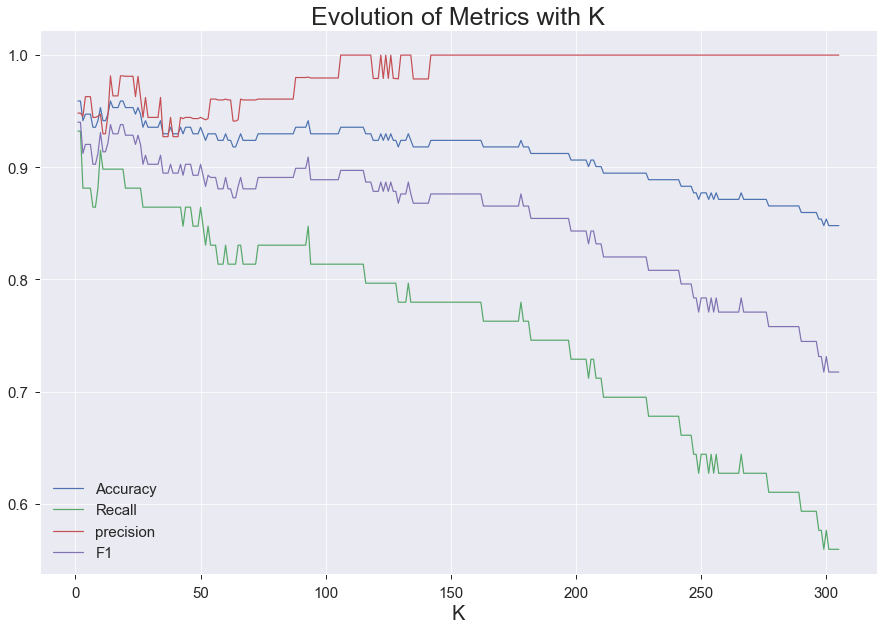

In [108]:
#Plot the data
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(metrics_df)
ax.set_title("Evolution of Metrics with K", fontsize=25)
#Axis
ax.set_xlabel("K", fontsize=20)
ax.tick_params(labelsize=15)

ax.legend(metrics_df.columns, loc="lower left", fontsize=15)

**Observation:**<br>
For k>100, we can see that precision is going to one. It means that we have no **False Positive** .i.e all benign tumors are well classified.

From the graph above, we see that a given value of K maximise the F1-score and Accuracy. Moreover, above we made some assumption in the model:
- Weighting scheme: distance
- p = 2: Euclidean metric

One might wonder if:
- We choose the best set of hyperparameters in the models
- What is the optimal value for k

Below, we will try to tune the parameters of the KNN model. For that we will use **GridSearchCV**.

In [109]:
#Exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV

In [110]:
# Dict of hyperparameters to optimize
param_grid = {"n_neighbors": list(range(1,K_max,2)), 
              "weights": ("uniform", "distance"), 
              "p": (1,2)}
#n_neighbors is a list of odd numbers

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = ['accuracy','f1'], refit="accuracy")
grid.fit(X_train,y_train)

print ("Best accuracy score: %5.3f"%grid.best_score_)
#Parameter setting that gave the best results
print (grid.best_params_)
print (grid.best_estimator_)

Best accuracy score: 0.975
{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
KNeighborsClassifier()


In [111]:
#Model with hyperparamaters tuned
knn = KNeighborsClassifier(n_neighbors = 5, p=2, weights="uniform")
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

#Classification report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9402    0.9821    0.9607       112
           1     0.9630    0.8814    0.9204        59

    accuracy                         0.9474       171
   macro avg     0.9516    0.9317    0.9405       171
weighted avg     0.9480    0.9474    0.9468       171



### 6.4 Decision Tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

In [113]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=1082)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

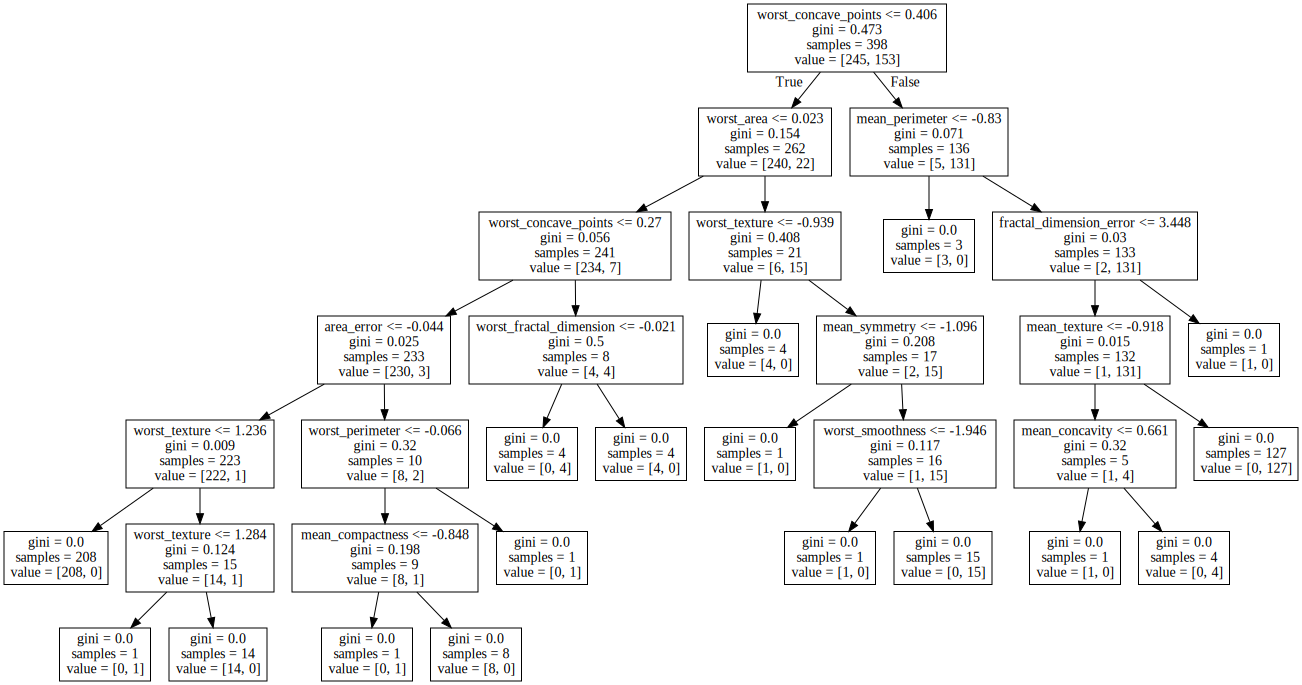

In [114]:
#Tree graph
graph = Source(export_graphviz(dtree, out_file=None, feature_names = X_train.columns))
SVG(graph.pipe(format='svg'))

**Observation**: The decision tree above reached leafs with a depth of 6. All the leafs have a gini of 0 meaning the model has exactly fitted the data

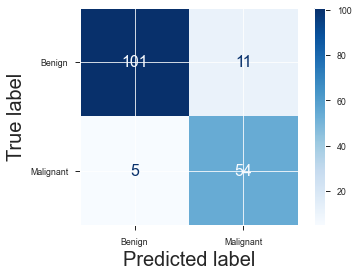

In [115]:
#Confusion Matrix
hp.plot_cm(dtree, X_test, y_test, labels=['Benign','Malignant'])

**Obersvation**: 5 Malignants tumors were miss-identified (False Negative)

In [116]:
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9528    0.9018    0.9266       112
           1     0.8308    0.9153    0.8710        59

    accuracy                         0.9064       171
   macro avg     0.8918    0.9085    0.8988       171
weighted avg     0.9107    0.9064    0.9074       171



### 6.5 Support Vector Machines

In [117]:
from sklearn.svm import SVC

In [118]:
clf  = SVC(kernel='linear', C= 1000)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

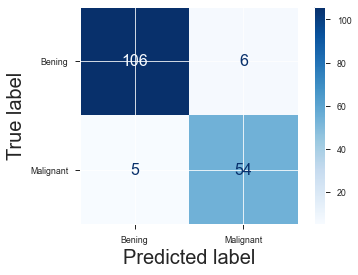

In [119]:
#Confusion Matrix
hp.plot_cm(clf, X_test, y_test, labels=['Bening','Malignant'])

In [120]:
print(classification_report(y_test,y_pred, digits=4 ))

              precision    recall  f1-score   support

           0     0.9550    0.9464    0.9507       112
           1     0.9000    0.9153    0.9076        59

    accuracy                         0.9357       171
   macro avg     0.9275    0.9308    0.9291       171
weighted avg     0.9360    0.9357    0.9358       171



### 6.6 Identifying the best model <br>

| Model | Accuracy | F1-Score|
| --- | --- | --- |
| Logistic Regression | 0.9766 | 0.9649 |
| KNN | 0.9474 | 0.9204 |
| Decision Tree | 0.9024 | 0.8710 |
| SVM | 0.9357 | 0.9076 |

The **Logistic Regression** has the highest accuracy and F1-score. Thus, in our problem it could be considered as the best model.

### 6.6 Going further - Best Model with removing highly correlated data
We know that the logistic regression as a time complexity of $O(mn^2)$ to $O(mn^3)$. So if we select only the most relevant features the program should go faster. We saw above that some features are highly correlated (mean_radius, mean_area, mean_perimeter,...).

Let's build a function that:
- take as inputs models and a dataset
- return a dataframe with Accuracy and F1-score

In [121]:
def best_model(X,y):
    #Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1278)
    
    #Models
    log_reg = LogisticRegression(solver='liblinear')
    knn = KNeighborsClassifier(n_neighbors = 5, p = 2, weights = "uniform")
    dtree = DecisionTreeClassifier(max_depth=10, random_state=1082)
    clf  = SVC(kernel='linear', C= 1000)
    
    list_model=["Logistic Regression", "KNN", "Decision Tree", "SVC"]
    
    #Train
    log_reg.fit(X_train,y_train)
    knn.fit(X_train,y_train)
    dtree.fit(X_train,y_train)
    clf.fit(X_train,y_train)
    
    #Predict
    y_log= log_reg.predict(X_test)
    y_knn= knn.predict(X_test)
    y_dtree= dtree.predict(X_test)
    y_svc= clf.predict(X_test)
    
    list_pred=[y_log,y_knn,y_dtree,y_svc]
    
    #Metrics
    df_metrics = pd.DataFrame(columns=["Model","Accuracy","F1_score"])
    for i, y in enumerate(list_pred):
        #Metrics
        acc = accuracy_score(y_test, y)
        f1 = f1_score(y_test, y)
        
        new_row = {"Model": list_model[i],"Accuracy":round(acc,4),"F1_score": round(f1,4)}
        df_metrics = df_metrics.append(new_row, ignore_index=True)
        
    #Set Model as index
    df_metrics.set_index("Model", drop= True, inplace= True)
    
    #Sort df on Accuracy and F1_score
    df_metrics.sort_values(by=["Accuracy", "F1_score"], axis = 0, ascending = False, inplace = True)
    
    return(df_metrics)

In [122]:
best_model(X,y)

,Accuracy,F1_score
Model,,
Logistic Regression,0.9766,0.9649
KNN,0.9474,0.9204
SVC,0.9357,0.9076
Decision Tree,0.9064,0.8710


Let's now remove the highly correlated features, identified in **3.2**

In [123]:
#First, let's only keep the mean_radius
X1= X.drop(columns=["mean_perimeter","mean_area","worst_radius", "worst_area", "worst_perimeter"])
best_model(X1,y)

,Accuracy,F1_score
Model,,
Logistic Regression,0.9649,0.9483
KNN,0.9474,0.9217
SVC,0.9357,0.9076
Decision Tree,0.9240,0.8926


In [124]:
#Second, let's only keep the mean_perimeter
X2= X.drop(columns=["mean_radius","mean_area","worst_radius", "worst_area", "worst_perimeter"])
best_model(X2,y)

,Accuracy,F1_score
Model,,
Logistic Regression,0.9708,0.9565
KNN,0.9474,0.9217
SVC,0.9415,0.9153
Decision Tree,0.9123,0.8760


In [125]:
#Third, let's only keep the mean_area
X2= X.drop(columns=["mean_radius","mean_perimeter","worst_radius", "worst_area", "worst_perimeter"])
best_model(X2,y)

,Accuracy,F1_score
Model,,
Logistic Regression,0.9708,0.9565
SVC,0.9532,0.9310
KNN,0.9474,0.9217
Decision Tree,0.9064,0.8667


**Observation**: The *mean_radius* contined the most important information as the accuracy and f1-score is higher when keeping only the *mean_radius*. Furthermore, the Logistic regression model is the best model in all three cases.<br>
**BUT** the performance is lower (by a small amount) compared to when using all features

In [126]:
#Removing the feature with the least explanatory power from 3.2

X2= X.drop(columns=["mean_smoothness", "smoothness_error", "worst_smoothness", "mean_fractal_dimension",
"fractal_dimension_error", "worst_fractal_dimension", "mean_symmetry", "symmetry_error", "worst_symmetry"])
best_model(X2,y)

,Accuracy,F1_score
Model,,
Logistic Regression,0.9649,0.9474
KNN,0.9415,0.9138
Decision Tree,0.9298,0.9032
SVC,0.9298,0.8983


**Observation** the performance is lower (by a small amount) compared to when using all features

### 6.7 Features with the best explanatory power

In [127]:
#Selecting features
X2= X[["mean_radius", "mean_perimeter", "mean_area", "worst_radius",
      "worst_perimeter", "worst_area", "worst_concave_points", "mean_concave_points"]]
best_model(X2,y)

,Accuracy,F1_score
Model,,
Logistic Regression,0.9474,0.9256
SVC,0.9415,0.9153
KNN,0.9415,0.9123
Decision Tree,0.8830,0.8413


### 6.8 Going further - Importance of each variable 
Now that we know that the *Logistic Regression* is the best model in our case, let us see which parameter contained the less information. To do so, we will remove each feature one by one and compute the metrics for the Logistic Regression model.

In [128]:
Var_df = pd.DataFrame(index=["Accuracy", "F1_Score"], columns=X_train.columns)
#Loop on the features
for feature in list(Var_df.columns):
    #Models
    log_reg = LogisticRegression(solver='liblinear')
    #Drop feature
    X_train_bis = X_train.drop(columns=[feature])
    X_test_bis = X_test.drop(columns=[feature])
    
    #Train
    log_reg.fit(X_train_bis,y_train)
    #Predict
    y_log= log_reg.predict(X_test_bis)
    
    #Metrics
    acc = accuracy_score(y_test, y_log)
    f1 = f1_score(y_test, y_log)
    
    #Put data in the df
    Var_df.loc["Accuracy", feature] = round(acc,3)
    Var_df.loc["F1_Score", feature] = round(f1,3)

Var_df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
Accuracy,0.977,0.971,0.977,0.977,0.977,0.977,0.971,0.959,0.977,0.977,...,0.977,0.971,0.977,0.977,0.971,0.977,0.977,0.971,0.977,0.977
F1_Score,0.965,0.956,0.965,0.965,0.965,0.965,0.957,0.939,0.965,0.965,...,0.965,0.957,0.965,0.965,0.957,0.965,0.965,0.956,0.965,0.965


In [129]:
#Top with least explanatory power
top_df = Var_df.sort_values(by=["Accuracy", "F1_Score"], axis = 1, ascending = False)

In [130]:
print(np.where(top_df.loc["F1_Score",:]>0.9649)) # With the logistic regression f1_score = 0.9649
print(np.where(top_df.loc["Accuracy",:]>0.9766)) # With the logistic regression accuracy = 0.9766

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64),)


In [131]:
top_df.columns[:19]

Index(['smoothness_error', 'mean_radius', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_symmetry',
       'mean_fractal_dimension', 'texture_error', 'perimeter_error',
       'area_error', 'concavity_error', 'worst_radius', 'worst_perimeter',
       'worst_area', 'worst_compactness', 'worst_concavity', 'worst_symmetry',
       'worst_fractal_dimension'],
      dtype='object')

**Observation**: We see that worst features (i.e that contains the less information) using the best model (Logistic Regression) are 'smoothness_error', 'mean_radius', 'mean_perimeter', 'mean_area','mean_smoothness', 'mean_compactness', 'mean_symmetry', 'mean_fractal_dimension', 'texture_error', 'perimeter_error', 'area_error', 'concavity_error', 'worst_radius', 'worst_perimeter', 'worst_area', 'worst_compactness', 'worst_concavity', 'worst_symmetry', 'worst_fractal_dimension'<br><br>
By removing those features one by one we have optimized the fit of the models. Moving further we could remove those features from the dataset.

### 6.9 Going further - Removing  features with less information

In [132]:
#Remove features
list_remove = ['smoothness_error', 'mean_radius', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_symmetry',
       'mean_fractal_dimension', 'texture_error', 'perimeter_error',
       'area_error', 'concavity_error', 'worst_radius', 'worst_perimeter',
       'worst_area', 'worst_compactness', 'worst_concavity', 'worst_symmetry',
       'worst_fractal_dimension']
X_final = X.drop(columns = list_remove)

best_model(X_final,y)

,Accuracy,F1_score
Model,,
Logistic Regression,0.9532,0.9310
SVC,0.9298,0.9016
KNN,0.9298,0.8947
Decision Tree,0.8947,0.8475


**Observation** removing all the features leads to a lower F1_score and Accuracy. They might be a set of optimal features to remove to optimize the models.

### 6.10 Removing high correlated features and features with less information

In [133]:
#Remove features
list_remove = ["mean_perimeter","mean_area","worst_radius", "worst_area", "worst_perimeter",
               'smoothness_error', 'mean_radius', 'mean_perimeter', 'mean_area',
               'mean_smoothness', 'mean_compactness', 'mean_symmetry',
               'mean_fractal_dimension', 'texture_error', 'perimeter_error',
               'area_error', 'concavity_error', 'worst_radius', 'worst_perimeter',
               'worst_area', 'worst_compactness', 'worst_concavity', 'worst_symmetry',
               'worst_fractal_dimension']
X_final = X.drop(columns = list_remove)

best_model(X_final,y)

,Accuracy,F1_score
Model,,
Logistic Regression,0.9532,0.9310
SVC,0.9298,0.9016
KNN,0.9298,0.8947
Decision Tree,0.8947,0.8475


**Observation** The performance of the models are lower when removing the data identify above, as we said they might be an optimal seat of features to remove. The main advantage of removing those features is that we have now less risk of overfitting.

### Conclusion

In conclusion, the way we proceeded to complete our task is the following:
1. We firstly analysed our datasample using all features given in the dataset. We fitted on the training sample and then predicted the results on the testing sample. The scoring results we obtained were pretty high so all the four models (LogisticRegression, KNN, DecisionTree, SVM) have a good reliability on predicting if a cancer is Malignant or Benign. 
<br><br>

2. After that, we decided to remove some features in order to avoid overfitting in our models:
    - First, we searched for highly correlated features using a correlation matrix. We conclude that "mean_perimeter","mean_area","worst_radius", "worst_area", "worst_perimeter" could be removed for the data set and only keep "mean_radius".
    - Then, we plotted a density function of the remained features were more informative visually at splitting parameters. We found that Mean radius, mean perimeter, mean area, worst radius, worst perimeter, worst area, worst concave points, mean concave points are the parameter which seems to have the best explanatory power.
    - Finally, by removing the features one by one we tried to find an optimal set of features to remove.<br><br>
3. Then, we used the models with our new datasets. We can notice from the last table that the accuracy and F1 score is still high even though a bit smaller than the case we considered all features. However, now we are running less risk of overfitting.